In [128]:
import sys
sys.path.append("../../")
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]
def find_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

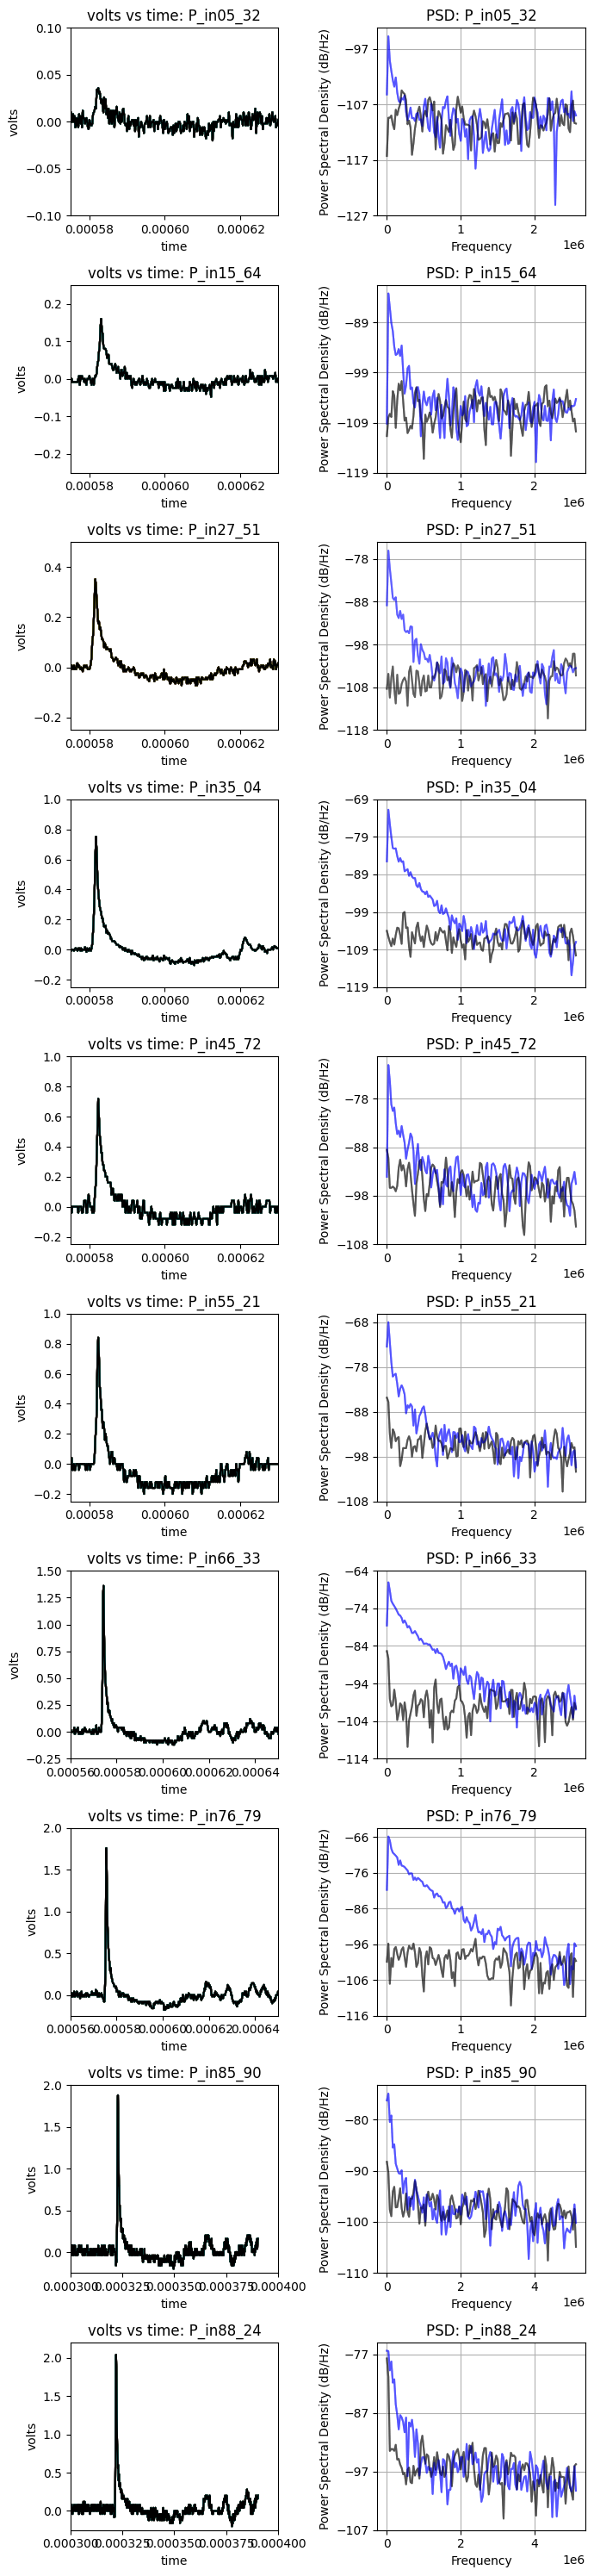

In [153]:
powers = ["P_in05_32", "P_in15_64", "P_in27_51", "P_in35_04", "P_in45_72", "P_in55_21", "P_in66_33", "P_in76_79", "P_in85_90", "P_in88_24"]
file = ["hantekWaveData71" + str(x) + ".csv" for x in range(30, 40)]
data = []
tbase = []
vbase = []
size = []
for i in range(0, len(powers)):
    d = []
    t = []
    v = []
    s = []
    for j in range(0, len(file)):
        if i != 2 or j != 0:
            d.append(np.genfromtxt("../../data/20240916/" + powers[i] + "/" + file[j], delimiter = ",")[2:-100])
            f = open("../../data/20240916/" + powers[i] + "/" + file[j], 'r')
            t.append(int(f.readline().rstrip()[10:-4]) * 1e-10)
            v.append(int(f.readline().rstrip()[11:-8]) / 100000)
            s.append(int(f.readline().rstrip()[6:]))
            d[-1][:, 0] = np.linspace(0, t[-1], s[-1])[1:-100]
        else:
            pass
    tbase.append(t)
    vbase.append(v)
    size.append(s)
    data.append(d)
fig, ax = plt.subplots(10, 2, figsize = (7, 30))
y_lims = [(-0.1, 0.1), (-0.25, 0.25), (-0.25, 0.5), (-0.25, 1), (-0.25, 1), (-0.25, 1), (-0.25, 1.5), (-0.25, 2), (-0.25, 2), (-0.25, 2.2)]
for d in range(len(data)):
    ax[d][0].set_title("volts vs time: " + powers[d])
    ax[d][0].set_xlabel("time")
    ax[d][0].set_ylabel("volts")
    ax[d][1].set_title("PSD: " + powers[d])
    ax[d][1].set_xlabel("freqs.")
    ax[d][1].set_ylabel("PSD")
    signal = []
    noise = []
    freqs = []
    for s in data[d]:
        ax[d][0].plot(s[:, 0], s[:, 1])
        if d < 6:
            sig, freqs = ax[d][1].psd(s[:, 1][find_idx(s[:, 0], 5.2e-4):find_idx(s[:, 0], 7e-4)], Fs = 4100 / np.mean(tbase[d]), NFFT = 256, c = "b", alpha = 0.1)
            n, freqs = ax[d][1].psd(s[:, 1][find_idx(s[:, 0], 3.6e-4):find_idx(s[:, 0], 5.2e-4)], Fs = 4100 / np.mean(tbase[d]), NFFT = 256, c = "k", alpha = 0.1)
        elif d < 8:
            sig, freqs = ax[d][1].psd(s[:, 1][find_idx(s[:, 0], 5.6e-4):find_idx(s[:, 0], 7e-4)], Fs = 4100 / np.mean(tbase[d]), NFFT = 256, c = "b", alpha = 0.1)
            n, freqs = ax[d][1].psd(s[:, 1][find_idx(s[:, 0], 4.2e-4):find_idx(s[:, 0], 5.6e-4)], Fs = 4100 / np.mean(tbase[d]), NFFT = 256, c = "k", alpha = 0.1)
        else:
            sig, freqs = ax[d][1].psd(s[:, 1][find_idx(s[:, 0], 3e-4):], Fs = 4100 / np.mean(tbase[d]), NFFT = 256, c = "b", alpha = 0.1)
            n, freqs = ax[d][1].psd(s[:, 1][find_idx(s[:, 0], 2e-4):find_idx(s[:, 0], 3e-4)], Fs = 4100 / np.mean(tbase[d]), NFFT = 256, c = "k", alpha = 0.1)
        ax[d][0].plot(np.mean([data[d][i][:, 0] for i in range(0, len(data[d]))], axis = 0), np.mean([data[d][i][:, 1] for i in range(0, len(data[d]))], axis = 0), c = "k")
    if d < 6:
        ax[d][0].set_xlim(0.000575, 0.00063)
    elif d < 8:
        ax[d][0].set_xlim(0.00056, 0.00065)
    else:
        ax[d][0].set_xlim(0.0003, 0.0004)
    ax[d][0].set_ylim(*y_lims[d])
plt.tight_layout()
plt.show()

In [9]:
import sys
sys.path.append("../../")
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
import decimal as d
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]
def find_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [11]:
p_ins = "Pin_01_07  Pin_10_18  Pin_20_05  Pin_30_62  Pin_40_10  Pin_50_47  Pin_59_72  Pin_60_05  Pin_70_66  Pin_71_45  Pin_81_64  Pin_91_40  Pin_64_10".split()
sample_rates = []
sizes = []
trace_length = []

data = []
time = []
for p in p_ins[-1:]:
    rate = np.array([])
    size = np.array([], dtype = int)
    length = np.array([], dtype = np.dtype(d.Decimal))
    
    x = np.array([])
    t = np.array([], dtype = np.dtype(d.Decimal))
    for i in range(1, 1001):
        file = open("../../data/20240920/" + p + "/shot" + str(i) + ".csv")
        file.readline()
        rate = np.append(rate, float(file.readline()))
        file.readline()
        size = np.append(size, int(file.readline()))
        file.readline()
        length = np.append(length, d.Decimal(file.readline()))
        file.readline()
        if i == 1:
            x = np.append(x, np.array([d.Decimal(a) for a in file.readline().split(",")[100:]], dtype = np.dtype(d.Decimal)))
            x = scp.signal.detrend(x, type = "linear")
        else:
            x = np.vstack((x, np.array([d.Decimal(a) for a in file.readline().split(",")[100:]], dtype = np.dtype(d.Decimal))))
            x[-1] = scp.signal.detrend(x[-1], type = "linear")
        if i == 1:
            t = np.append(t, np.array([length[-1] * (d.Decimal(b) / d.Decimal(str(size[-1] - 100))) for b in range(0, size[-1] - 100)], dtype = np.dtype(d.Decimal)))
        else:
            t = np.vstack((t, np.array([length[-1] * (d.Decimal(b) / d.Decimal(str(size[-1] - 100))) for b in range(0, size[-1] - 100)], dtype = np.dtype(d.Decimal))))
        file.close()
    sample_rates.append(rate)
    sizes.append(size)
    trace_length.append(length)
    
    data.append(x)
    time.append(t)

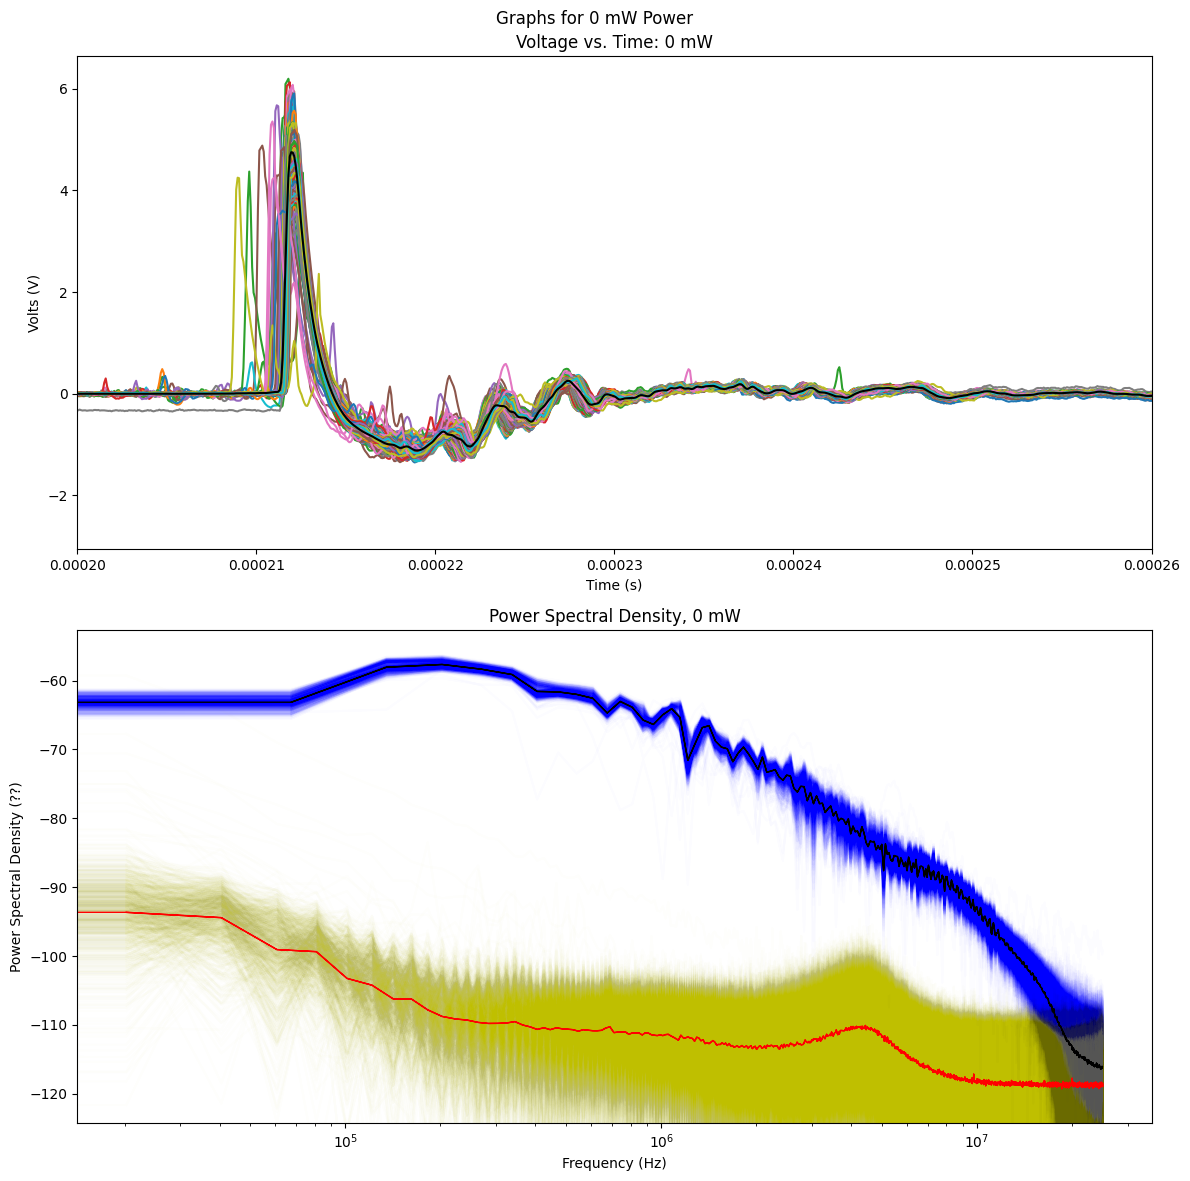

In [20]:
sig_times = [(8e-5, 10e-5), (5e-5, 10e-5), (3.8e-5, 6e-5), (0, 2e-5), (3.8e-5, 6e-5), (3.8e-5, 6e-5), (4e-5, 6e-5), (3.8e-5, 6e-5), (3.8e-5, 6e-5), (4e-5, 6e-5), (3.8e-5, 6e-5), (3.8e-5, 6e-5), (2e-4, 2.6e-4)]
signal = []
noise = []
signal_freq = []
noise_freq = []
indexes = np.array(np.delete(np.linspace(0, len(p_ins) - 1, len(p_ins)), 3), dtype = int)
for i in indexes:
    fig, ax = plt.subplots(2, 1, figsize = (12, 12))
    sig = np.array([])
    noi = np.array([])
    sig_fre = np.array([])
    noi_fre = np.array([])
    # for j in range(0, len(data[i])):
    for j in range(0, 1000):
        ax[0].plot(time[i][j].astype(np.float64), data[i][j].astype(np.float64))
        s_fft = np.fft.fft(data[i][j][find_idx(time[i][j], d.Decimal(sig_times[i][0])):find_idx(time[i][j], d.Decimal(sig_times[i][1]))], len(data[i][j][find_idx(time[i][j], d.Decimal(sig_times[i][0])):find_idx(time[i][j], d.Decimal(sig_times[i][1]))]), axis = 0)
        s_f = np.fft.fftfreq(len(data[i][j][find_idx(time[i][j], d.Decimal(sig_times[i][0])):find_idx(time[i][j], d.Decimal(sig_times[i][1]))]))
        n_fft = np.fft.fft(data[i][j][:find_idx(time[i][j], d.Decimal(sig_times[i][0]))], len(data[i][j][:find_idx(time[i][j], d.Decimal(sig_times[i][0]))]), axis = 0)
        n_f = np.fft.fftfreq(len(data[i][j][:find_idx(time[i][j], d.Decimal(sig_times[i][0]))]))
        ax[1].plot(np.abs(s_f) * 5e7, 10 * np.log10((1 / (len(data[i][j][find_idx(time[i][j], d.Decimal(sig_times[i][0])):find_idx(time[i][j], d.Decimal(sig_times[i][1]))]) * sample_rates[i][j])) * np.power(np.abs(s_fft), 2)), c = "b", alpha = 0.01)
        ax[1].plot(np.abs(n_f) * 5e7, 10 * np.log10((1 / (len(data[i][j][:find_idx(time[i][j], d.Decimal(sig_times[i][0]))]) * sample_rates[i][j])) * np.power(np.abs(n_fft), 2)), c = "y", alpha = 0.01)
        if j == 0:
            sig = np.append(sig, 10 * np.log10((1 / (len(data[i][j][find_idx(time[i][j], d.Decimal(sig_times[i][0])):find_idx(time[i][j], d.Decimal(sig_times[i][1]))]) * sample_rates[i][j])) * np.power(np.abs(s_fft), 2)))
            noi = np.append(noi, 10 * np.log10((1 / (len(data[i][j][:find_idx(time[i][j], d.Decimal(sig_times[i][0]))]) * sample_rates[i][j])) * np.power(np.abs(n_fft), 2)))
            sig_fre = np.append(sig_fre, np.abs(s_f) * 5e7)
            noi_fre = np.append(noi_fre, np.abs(n_f) * 5e7)
        else:
            sig = np.vstack((sig, 10 * np.log10((1 / (len(data[i][j][find_idx(time[i][j], d.Decimal(sig_times[i][0])):find_idx(time[i][j], d.Decimal(sig_times[i][1]))]) * sample_rates[i][j])) * np.power(np.abs(s_fft), 2))))
            noi = np.vstack((noi, 10 * np.log10((1 / (len(data[i][j][:find_idx(time[i][j], d.Decimal(sig_times[i][0]))]) * sample_rates[i][j])) * np.power(np.abs(n_fft), 2))))
            sig_fre = np.vstack((sig_fre, np.abs(s_f) * 5e7))
            noi_fre = np.vstack((noi_fre, np.abs(n_f) * 5e7))
    signal.append(sig)
    noise.append(noi)
    signal_freq.append(sig_fre)
    noise_freq.append(noi_fre)
    
    ax[0].plot(np.mean(time[i], axis = 0), np.mean(data[i], axis = 0), c = "k")
    ax[0].set_title("Voltage vs. Time: " + str(i * 10) + " mW")
    ax[0].set_xlabel("Time (s)")
    ax[0].set_ylabel("Volts (V)")
    ax[0].set_xlim(2e-4, 2.6e-4)
    
    ax[1].plot(np.mean(noi_fre, axis = 0), np.mean(noi, axis = 0), c = "r", lw = 1)
    ax[1].plot(np.mean(sig_fre, axis = 0), np.mean(sig, axis = 0), c = "k", lw = 1)
    ax[1].set_xscale("log")
    ax[1].set_title("Power Spectral Density, " + str(i * 10) + " mW")
    ax[1].set_xlabel("Frequency (Hz)")
    ax[1].set_ylabel("Power Spectral Density (??)")
    # ax[1].set_xlim(-1, 2e7)
    ax[1].set_ylim(np.min(np.mean(noi, axis = 0)) - 5, np.max(np.mean(sig, axis = 0)) + 5)

    fig.suptitle("Graphs for " + str(i * 10) + " mW Power")
    fig.savefig("power" + str(i * 10) + ".png")
    
    plt.tight_layout()
    plt.show()

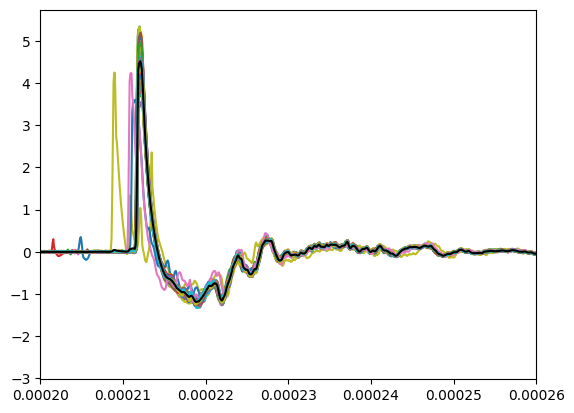

<Figure size 1200x600 with 0 Axes>

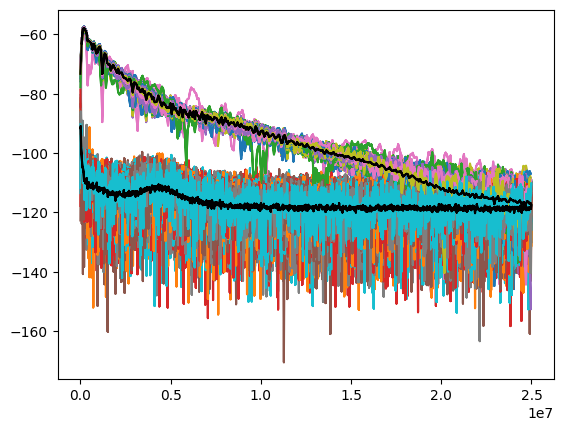

In [39]:
# SHOT # 72 IS SO WEIRD
min = 900
max = 1000
for i in range(min, max):
    plt.plot(time[0][i], data[0][i])
plt.plot(np.mean(time[0][min:max], axis = 0), np.mean(data[0][min:max], axis = 0), c = "k")
plt.xlim(2e-4, 2.6e-4)
plt.figure(figsize = (12, 6))
plt.show()

for i in range(min, max):
    plt.plot(signal_freq[0][i], signal[0][i])
    plt.plot(noise_freq[0][i], noise[0][i])
plt.plot(np.mean(signal_freq[0][min:max], axis = 0), np.mean(signal[0][min:max], axis = 0), c = "k")
plt.plot(np.mean(noise_freq[0][min:max], axis = 0), np.mean(noise[0][min:max], axis = 0), c = "k")
plt.show()